In [1]:
import pandas as pd
import numpy as np

# 히트맵 그려보기
# %amtplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
weather = pd.read_csv('C:/project22/final_fire_weather_7yr.csv')

# condition = (weather.발생장소_시도 == '강원')
# weather[condition]

In [3]:
weather[weather['산불발생여부'] == 1]

,산불발생여부,발생장소_시도,관측일,평균기온,일최고기온,일최고기온시각,일최저기온,일최저기온시각,일평균현지기압,일최고현지기압,...,일최대순간풍속시각,일최대순간풍속풍향,풍정합,일평균전운량,일평균중하층운량,최다운량,최다운량시각,일합계일조시간,일합계일사량,일평균지면온도
7,1,경북,20140104,1.150,7.679,1229.000,-4.086,995.500,1003.321,1005.200,...,1179.929,163.571,1746.786,6.825,5.075,9.000,875.000,5.957,8.805,0.707
16,1,경북,20140109,-4.386,0.193,581.500,-8.271,2316.571,1009.593,1013.871,...,1015.786,280.000,3456.643,2.625,2.075,2.750,375.000,7.893,11.495,-2.593
24,1,강원,20140113,-6.538,0.000,1483.846,-11.785,694.538,1002.677,1004.677,...,1120.154,259.231,1206.846,0.067,0.067,0.500,300.000,8.508,11.232,-4.862
27,1,경북,20140114,-3.771,3.579,1427.143,-10.221,678.357,1015.857,1017.371,...,1209.286,271.429,1526.929,1.875,1.700,3.500,500.000,8.450,11.550,-3.193
28,1,강원,20140115,-4.500,2.892,1472.923,-11.500,678.462,1003.300,1005.192,...,1598.308,250.000,1210.077,0.000,0.000,0.000,300.000,8.515,10.890,-4.377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5469,1,경북,20201216,-5.250,-1.093,1377.143,-8.536,913.357,1012.629,1014.007,...,1343.786,285.000,2889.286,0.650,0.593,1.143,471.429,7.836,10.792,-3.221
5471,1,경북,20201217,-4.114,1.971,1421.143,-10.107,553.643,1013.321,1014.707,...,1370.714,266.429,2216.357,0.993,0.607,4.643,1114.286,7.807,10.668,-2.850
5485,1,경북,20201224,3.964,9.736,1324.000,-1.186,1027.500,1001.129,1003.671,...,1271.143,281.429,2524.929,3.443,1.143,9.714,485.714,6.671,8.832,2.129
5486,1,경북,20201224,3.964,9.736,1324.000,-1.186,1027.500,1001.129,1003.671,...,1271.143,281.429,2524.929,3.443,1.143,9.714,485.714,6.671,8.832,2.129


In [4]:
# weather.isnull().sum()

In [5]:
# sanbul = pd.read_excel('C:\project22\sanbul.xls'
#                        , sheet_name = "Sheet1")

In [6]:
# # 열 이름이 되야할 데이터 추출
# index_fix = sanbul.loc[1]

# # 열이름 변경
# sanbul.columns = index_fix

# # 필요없는 행 제거
# sanbul = sanbul.drop([0, 1])

# # 년 월 일 합치기?
# # 날짜 데이터와 형태 같게 만들기 yyyy-mm-dd
# sanbul['tm'] = sanbul['발생일시_년'] + '-' + sanbul['발생일시_월'] + '-' + sanbul['발생일시_일']

# sanbul['mon_region'] = sanbul['발생일시_월'] + sanbul['발생장소_시도']

# # 발생장소_시도 = 강원, 경북, 울진만 추출
# condition = (sanbul.발생장소_시도 == '강원') | (sanbul.발생장소_시도 == '경북') 
# sanbul_region = sanbul[condition]


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# from sklearn.datasets import 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, recall_score, precision_score

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [8]:
weather.columns

Index(['산불발생여부', '발생장소_시도', '관측일', '평균기온', '일최고기온', '일최고기온시각', '일최저기온',
       '일최저기온시각', '일평균현지기압', '일최고현지기압', '일최고현지기압시각', '일최저현지기압', '일최저현지기압시각',
       '일평균해면기압', '일최고해면기압', '일최고해면기압시각', '일최저해면기압', '일최저해면기압시각', '일평균상대습도',
       '일최소상대습도', '일최소상대습도시각', '일평균수증기압', '일최고수증기압', '일최고수증기압시각', '일최저수증기압',
       '일최저수증기압시각', '일평균풍속', '일최대풍속', '일최대풍속시각', '일최대풍속풍향', '일최대순간풍속',
       '일최대순간풍속시각', '일최대순간풍속풍향', '풍정합', '일평균전운량', '일평균중하층운량', '최다운량', '최다운량시각',
       '일합계일조시간', '일합계일사량', '일평균지면온도'],
      dtype='object')

In [9]:
# train test 나누기
from sklearn.preprocessing import StandardScaler


X = weather[['평균기온', '일최고기온', '일최고기온시각', '일최저기온',
       '일최저기온시각', '일평균현지기압', '일최고현지기압', '일최고현지기압시각', '일최저현지기압', '일최저현지기압시각',
       '일평균해면기압', '일최고해면기압', '일최고해면기압시각', '일최저해면기압', '일최저해면기압시각', '일평균상대습도',
       '일최소상대습도', '일최소상대습도시각', '일평균수증기압', '일최고수증기압', '일최고수증기압시각', '일최저수증기압',
       '일최저수증기압시각', '일평균풍속', '일최대풍속', '일최대풍속시각', '일최대풍속풍향', '일최대순간풍속',
       '일최대순간풍속시각', '일최대순간풍속풍향', '풍정합', '일평균전운량', '일평균중하층운량', '최다운량', '최다운량시각',
       '일합계일조시간', '일합계일사량', '일평균지면온도']]

y = weather[['산불발생여부']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123 )

# 데이터 컬럼 단위 정규화
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.fit_transform(X_test)


In [10]:
# model 불러오기
model = LogisticRegression()

# model 학습시키기
model.fit(X_train, y_train)

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
column_names = list(X.columns)

In [12]:
# 데이터 컬럼에 따른 beta, exp(beta)체크
column_name = ['const'] + column_names
beta = np.concatenate([model.intercept_, model.coef_.reshape(-1)]).round(2) # 소수점 둘째자리까지 반올림
odds = np.exp(beta).round(2)
interpret = np.where(beta > 0, 'risky', 'protective') # np.where 조건문

# beta 해석 정리
beta_analysis = pd.DataFrame(np.c_[beta, odds, interpret], index = column_name, columns = ['beta', 'exp(beta)', 'interpret'])
beta_analysis

# exp(beta) : 독립변수가 한단계 증가할수록 종속변수가 몇배 증가한다

,beta,exp(beta),interpret
const,-1.84,0.16,protective
평균기온,-1.02,0.36,protective
일최고기온,1.46,4.31,risky
일최고기온시각,0.04,1.04,risky
일최저기온,-0.99,0.37,protective
일최저기온시각,0.02,1.02,risky
일평균현지기압,-0.14,0.87,protective
일최고현지기압,0.15,1.16,risky
일최고현지기압시각,-0.28,0.76,protective
일최저현지기압,-0.01,0.99,protective


In [13]:
# 예측
# 첫 컬럼 =  p가 y는 0일 확률 / 두번째 컬럼 = 산불 확률

model.predict_proba(X_test)
# index_names = column_names
# columns = ['sanbul X', 'sanbul O']

# predict_df = pd.DataFrame(model.predict_proba(X_test), index=index_names, columns= columns)

model.predict_proba(X_test)

array([[0.9013851 , 0.0986149 ],
       [0.22558291, 0.77441709],
       [0.95970129, 0.04029871],
       ...,
       [0.9948148 , 0.0051852 ],
       [0.54857594, 0.45142406],
       [0.36961413, 0.63038587]])

In [14]:
# X_test에 대한 P(Y=0) 예측 확률값과 P(Y = 1) 예측 확률 값 - 직접 계산

# beta 곱하기 X 계산
Xbeta = np.matmul(np.c_[np.ones(X_test.shape[0]), X_test], beta.reshape(-1, 1))
# P(Y=1) 계산
P_1 = 1/ (1 + np.exp(-Xbeta))

# 패키지와 직접 계산 결과 비교
pd.DataFrame(np.concatenate([P_1, model.predict_proba(X_test)[:,1].reshape(-1, 1)], axis = 1), columns = ['직접', '패키지'])


,직접,패키지
0,0.102603,0.098615
1,0.774440,0.774417
2,0.038215,0.040299
3,0.334213,0.334577
4,0.044140,0.044141
...,...,...
1646,0.136831,0.137385
1647,0.920376,0.920889
1648,0.005283,0.005185
1649,0.456963,0.451424


In [15]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred
accuracy_score(y_pred, y_test)

cfmat = confusion_matrix(y_test, y_pred)
# print(cfmat)

print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1']))

# 정확도 : 분류한 데이터의 총수 중 알맞게 분류된 데이터의 비율

# 적합률 ㅣ 클래스 1에 분류된 데이터중 실제 1인 데이터 수의 비율
# 재현률 : 클래스 1에 분류된 데이터 중 클래스 1에 분류된 데이터 수의 비율
# f1-score : 적합률과 재현률의 조화 평균

              precision    recall  f1-score   support

     class 0       0.85      0.93      0.89      1284
     class 1       0.62      0.43      0.51       367

    accuracy                           0.82      1651
   macro avg       0.74      0.68      0.70      1651
weighted avg       0.80      0.82      0.80      1651



In [16]:
model.predict_proba(X_test)

array([[0.9013851 , 0.0986149 ],
       [0.22558291, 0.77441709],
       [0.95970129, 0.04029871],
       ...,
       [0.9948148 , 0.0051852 ],
       [0.54857594, 0.45142406],
       [0.36961413, 0.63038587]])

In [17]:
# X_test에 대한 P(Y=0) 예측 확률값과 P(Y = 1) 예측 확률 값 - 직접 계산

# beta 곱하기 X 계산
Xbeta = np.matmul(np.c_[np.ones(X_test.shape[0]), X_test], beta.reshape(-1, 1))
# P(Y=1) 계산
P_1 = 1/ (1 + np.exp(-Xbeta))

# 패키지와 직접 계산 결과 비교
pd.DataFrame(np.concatenate([P_1, model.predict_proba(X_test)[:,1].reshape(-1, 1)], axis = 1), columns = ['직접', '패키지'])

,직접,패키지
0,0.102603,0.098615
1,0.774440,0.774417
2,0.038215,0.040299
3,0.334213,0.334577
4,0.044140,0.044141
...,...,...
1646,0.136831,0.137385
1647,0.920376,0.920889
1648,0.005283,0.005185
1649,0.456963,0.451424


In [18]:
# 성능 평가
# cut_off = 정확도, 민감도, 정밀도 등등

Cut_off = np.linspace(0.01, 0.50, 10)

for cutoff in Cut_off:
    y_pred = np.where(P_1.reshape(-1) >= cutoff, 1, 0) # 확률값이 cut off보다 크면 1 산불, 아니면 0 산불X
    acc = accuracy_score(y_true = y_test, y_pred = y_pred) # 정확도 전체중 양성,음성 맞춘수
    recall = recall_score(y_true = y_test, y_pred = y_pred) # 민감도 양성중 맞춘 양성수
    precision = precision_score(y_true = y_test, y_pred = y_pred) # 정밀도 양성이라고 판정한 것 중 실제 양성 수
    
    print(acc, recall, precision, cutoff)

0.2943670502725621 1.0 0.239556135770235 0.01
0.5245305875227135 0.9591280653950953 0.3137254901960784 0.06444444444444444
0.6268927922471229 0.8991825613079019 0.36303630363036304 0.11888888888888888
0.7007874015748031 0.8555858310626703 0.41589403973509936 0.17333333333333334
0.7365233192004845 0.771117166212534 0.44637223974763407 0.22777777777777777
0.7722592368261659 0.7111716621253406 0.4915254237288136 0.2822222222222222
0.7952755905511811 0.6430517711171662 0.5327313769751693 0.33666666666666667
0.8134463961235615 0.5803814713896458 0.5803814713896458 0.3911111111111111
0.8195033313143549 0.5068119891008175 0.6138613861386139 0.44555555555555554
0.8158691701998788 0.4332425068119891 0.6235294117647059 0.5


Text(0, 0.5, 'True Positive Rate')

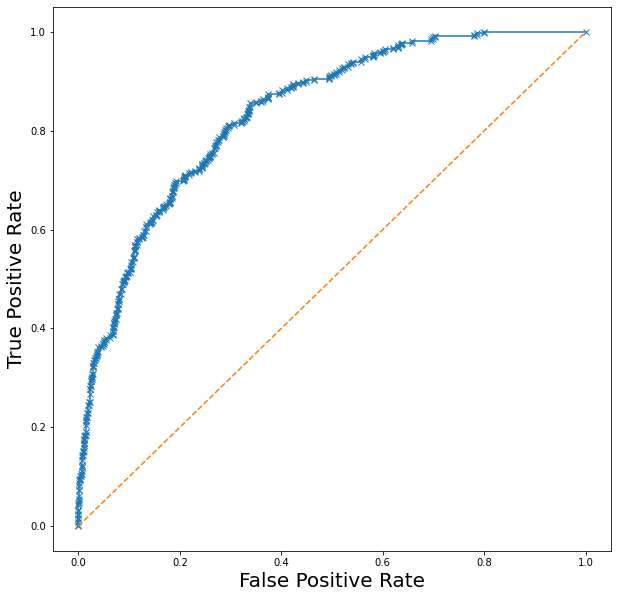

In [19]:
# X_test에 대한 예측확률
from sklearn import random_projection


probs = model.predict_proba(X_test)[:, 1]

# ROC curve X축, Y축 추출
model_fpr, model_tpr, threshold1 = roc_curve(y_test, probs)
random_fpr, random_tpr, threshold2 = roc_curve(y_test, [0 for i in range(X_test.__len__())])

# plot the roc curve for the model and random
plt.figure(figsize = (10, 10))
plt.plot(model_fpr, model_tpr, marker = 'x', label = 'Logistic')
plt.plot(random_fpr, random_tpr, linestyle = '--', label = 'Random')

# axis labels
plt.xlabel('False Positive Rate', size = 20)
plt.ylabel('True Positive Rate', size = 20)


In [20]:
from sklearn.metrics import roc_auc_score
print('auc = ', roc_auc_score(y_true=y_test, y_score=probs))


auc =  0.8370130807167655
